In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('BinSize_d400.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

/home/cameron/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Functions to manage data:

In [2]:
def format_data(df):
    # degree values to C
    df['Data_Value'] = 0.1 * df['Data_Value']

    # create datetime object for time management
    df['DTG'] = pd.to_datetime(df['Date'])
    df['Year'] = df['DTG'].apply(lambda x: x.year)
    df['Month'] = df['DTG'].apply(lambda x: x.month)
    df['Days'] = df['DTG'].dt.strftime('%m-%d')
    return df


In [3]:

def seperate_years(df):
    df_main = df[(df['Days'] != '02-29') & (df['Year'] != 2015)]
    df_2015 = df[(df['Days'] != '02-29') & (df['Year'] == 2015)]
    return df_main, df_2015

In [4]:

def high_low_dateSeries(df):
    df_max = df.groupby(['Element', 'Days']).max()
    df_min = df.groupby(['Element', 'Days']).min()
    max_series = df_max.loc['TMAX'].Data_Value
    min_series = df_min.loc['TMIN'].Data_Value
    return min_series, max_series


### Configure data for analysis

In [5]:
# read data
df = pd.read_csv('data.csv')

# format for use
df = format_data(df)

# seperate the years for analysis
df_main, df_2015 = seperate_years(df)

# collect temperatures by date
main_min, main_max = high_low_dateSeries(df_main)
min_2015, max_2015 = high_low_dateSeries(df_2015)



### Produce graphic for analysis

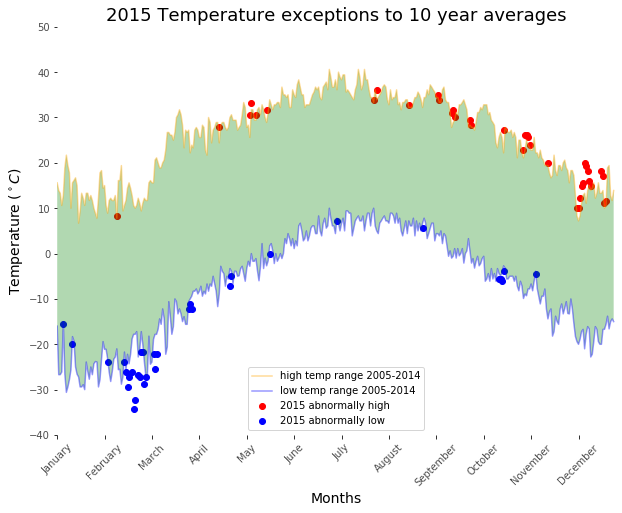

In [6]:
plt.figure(figsize=(10, 9))
# ten year range
plt.plot(range(len(main_max)), main_max, '-', color='orange', alpha=0.4, label='high temp range 2005-2014')
plt.plot(range(len(main_min)), main_min, '-', color='blue', alpha=0.4, label='low temp range 2005-2014')


# 2015 temperatures
plt.scatter(
        np.where(max_2015 > main_max),
        max_2015[max_2015 > main_max].values, 
        color='red',
        label='2015 abnormally high')

plt.scatter(
        np.where(min_2015 < main_min),
        min_2015[min_2015 < main_min].values, 
        color='blue',
        label='2015 abnormally low')

# configure plot
plt.xlabel('Months', size=14)

plt.ylabel('Temperature ($^\circ C$)', size=14)

months = [
        'January',
        'February',
        'March',
        'April',
        'May',
        'June',
        'July',
        'August',
        'September',
        'October',
        'November',
        'December']

plt.xticks(np.arange(0,365,31), months, alpha=0.7)
plt.yticks(alpha=0.7)

ax = plt.gca()
ax.set(frame_on=False)

ax.axis([0, 365, -40, 50])

plt.gca().fill_between(np.arange(0,365), main_min, main_max, facecolor='green', alpha=0.3)

plt.title('2015 Temperature exceptions to 10 year averages', size=18)

month_names = plt.gca().xaxis
for month in month_names.get_ticklabels():
    month.set_rotation(45)
plt.subplots_adjust(bottom=0.25)

plt.legend(loc=8)
plt.savefig('notable_temperatures_2015.png')

plt.show()


